In [1]:
import math
import datetime

# Child: M

In [2]:
triMOpp = 59.00  #M's height in inches.
triMAdj = 108
print("The ratio of the opposite over the adjacent =  {0:.2f}".format(triMOpp/triMAdj))

The ratio of the opposite over the adjacent =  0.55


In [3]:
angM = math.tan(triMOpp/triMAdj)
print("The sun was at {0:.2f} degrees".format(math.degrees(angM)))

The sun was at 34.84 degrees


# Child: B

In [4]:
triBOpp = 49.75 #B's height in inches.
triBAdj = 78
print("The ratio of the opposite over the adjacent =  {0:.2f}".format(triBOpp/triBAdj))

The ratio of the opposite over the adjacent =  0.64


In [5]:
angB = math.tan(triBOpp/triBAdj)
print("The sun was at {0:.2f} degrees".format(math.degrees(angB)))

The sun was at 42.47 degrees


# Questions
## #1 Angle Measurements
If we assume that our measurements were extremely precise, how would we answer these questions.

What is the difference in the angle of the sun (in degrees) between the children being measured?

In [6]:
print("The difference in angles is {0:.2f} degrees".format((math.degrees(angB)-math.degrees(angM))))

The difference in angles is 7.63 degrees


## #2 Time
The measurements were taken on the morning of Saturday, 15 Sep 2018.  Based on a weather calendar, the sun rose at 7:12:01 AM that morning.  Using the formula below, it is possible to take an angle and calculate how much time has passed since sunrise.  Here *w* is the hour angle of the sun, which is one of the three angles of the Earth-Sun dynamic.  For additional information, please refer to [Penn State](https://www.e-education.psu.edu/eme810/node/556).

\begin{equation*}
{w} = \frac{360\mathring{ }}{24 hr}(t_{sol}-12) = \frac{15\mathring{ }}{hr}(t_{sol}-12)
\end{equation*}

\begin{equation*}
{w}\frac{hr}{15\mathring{ }} = \frac{hr}{15\mathring{ }}\frac{15\mathring{ }}{hr}(t_{sol}-12) = t_{sol}-12
\end{equation*}

\begin{equation*}
{w}\frac{hr}{15\mathring{ }}+12 = t_{sol}-12+12
\end{equation*}

\begin{equation*}
{t_{sol}} = \frac{w}{15\mathring{ }}+12
\end{equation*}

This rearrangement of the equation gives us the total number of hours after sunrise for which the angle *w* was observed.  Having the time of sunrise and the result of this equation, it becomes straightforward to calculate the time of day the measurements were taken.

In [93]:
# Date and time of sunrise based on solar calendar
# The timezone is added as UTC, which is then adjusted to reflect local (EDT) time.
edtTimeDelta = datetime.timedelta(hours=4)
edtTZObject = datetime.timezone(edtTimeDelta,name="EDT")
timeSunRise = datetime.datetime(year=2017,month=9,day=15,hour=3,minute=12,second=1,tzinfo=edtTZObject)#+datetime.timedelta(hours=-4)

### Child: M
At what time of day was M measured?

In [94]:
timeM = 12+(math.degrees(angM)-180)/15
print("{0:.2f} hours after sunrise".format(timeM))
valDiffM = datetime.timedelta(hours=timeM)
print("For M, the measurements were taken on: "+(timeSunRise+valDiffM).strftime('%d %b %Y at %H:%M:%S'))
timeValM = timeSunRise+valDiffM

2.32 hours after sunrise
For M, the measurements were taken on: 15 Sep 2017 at 05:31:21


### Child: B
At what time of day was B measured?

In [95]:
timeB = 12+(math.degrees(angB)-180)/15
print("{0:.2f} hours after sunrise".format(timeB))
valDiffB = datetime.timedelta(hours=timeB)
print("For B, the measurements were taken on: "+(timeSunRise+valDiffB).strftime('%d %b %Y at %H:%M:%S'))
timeValB = timeSunRise+valDiffB

2.83 hours after sunrise
For B, the measurements were taken on: 15 Sep 2017 at 06:01:52


### Overall
How much time in hours was between the measurements?

In [96]:
print("{0:.4f} minutes".format(((valDiffB)-(valDiffM)).total_seconds()/(60*60)))

0.5086 minutes


## #3 Distances
For this question, we will assume the Earth is only rotating on its axes, and not rotating around the sun in an ellipse as well as rotating on its axes.

Secondarily, it will be easier to assume the equitorial, angular rotation speed and radius of Earth is fixed across the entire planet regardless of the present longitudinal position.Although this assumption is clearly violated, it removes the necessity to calculate seasonal, orbital, and tilt specifics for a location.  Given this model of rotation, how much had the Earth moved (in miles) between the children being measured, if the rate of rotation (velocity) of the Earth is 1040.4 MPH?

\begin{equation*}
{d} = {v}*(t_{B}-t_{M})
\end{equation*}

\begin{equation*}
t_{B}-t_{M} = \text{15 Sep 2017 10:01:52} - \text{15 Sep 2017 09:31:21} \approx 0.5086 \text{ hours}
\end{equation*}

In [97]:
valEarthAngSpeed = 1040.4  #Rate of rotation of Earth in MPH
valDistance = valEarthAngSpeed*((valDiffB)-(valDiffM)).total_seconds()/(60*60)
print("{0:.2f} miles covered beteeen measurements".format(valDistance))

529.11 miles covered beteeen measurements


# Energy Calculations
Let's assume we are located in sunny Florida.  Specifically, let's assume Miami, FL.  The coordinates for Miami, FL can be found using a variety of mapping applications, but Google provides a relatively straightforward by looking at the arguments in the [URL](https://www.google.com/maps/place/Miami,+FL/@25.7823404,-80.3695441,11z/data=!3m1!4b1!4m5!3m4!1s0x88d9b0a20ec8c111:0xff96f271ddad4f65!8m2!3d25.7616798!4d-80.1917902).  Buried in this string, provided below as plain text and before this sentence as a link, you can see the coordinates after the '@' symbol.  It has a latitude of 25.7823404&deg;N and a longitude of 80.3695441&deg;W

URL: https://www.google.com/maps/place/Miami,+FL/@25.7823404,-80.3695441,11z/data=!3m1!4b1!4m5!3m4!1s0x88d9b0a20ec8c111:0xff96f271ddad4f65!8m2!3d25.7616798!4d-80.1917902

Let's get the PySolar library setup, as it will help us calculate the radiation energy from the sun at the different times of day.

In [98]:
from pysolar.solar import *
from datetime import timezone
import pandas as pd

In [106]:
locLat = 25.7823404
locLon = 80.3695441

timeZoneM = timeValM
timeZoneB = timeValB

#timeZoneM = timeValM.replace(tzinfo=timezone.utc)
#timeZoneB = timeValB.replace(tzinfo=timezone.utc)

locLat = 40.0812
locLon = 82.8088

## Child: M

In [107]:
valAltitudeM = get_altitude(locLat,locLon,timeZoneM)
valRadiationM = radiation.get_radiation_direct(timeZoneM,valAltitudeM)
print(valAltitudeM)
print(valRadiationM)

14.843717313001909
545.782050666102


In [108]:
altitude_deg = get_altitude(locLat,locLon,timeValM.replace(tzinfo=timezone.utc))
radiation.get_radiation_direct(timeValM.replace(tzinfo=timezone.utc),altitude_deg)

893.4363867360987

In [109]:
valAltitudeB = get_altitude(locLat,locLon,timeZoneB)
valRadiationB = radiation.get_radiation_direct(timeZoneB,valAltitudeB)
print(valAltitudeB)
print(valRadiationB)

20.54382479299821
665.5975303119833


## Energy During Day

In [110]:
dfSunMeasures = pd.DataFrame({'Offset':list(range(-1,14)),'Sunrise':[timeSunRise]*15})
dfSunMeasures['TimeCalculated'] = dfSunMeasures.apply(lambda x: timeSunRise+datetime.timedelta(hours=x['Offset']),axis=1)

In [111]:
dfSunMeasures['Altitude'] = dfSunMeasures['TimeCalculated'].apply(lambda x: get_altitude(locLat,locLon,x))
dfSunMeasures['Radiation'] = dfSunMeasures.apply(lambda x: radiation.get_radiation_direct(x['TimeCalculated'],x['Altitude']),axis=1)

In [112]:
dfSunMeasures

,Offset,Sunrise,TimeCalculated,Altitude,Radiation
0,-1,2017-09-15 03:12:01+04:00,2017-09-15 02:12:01+04:00,-22.447229,0.000000
1,0,2017-09-15 03:12:01+04:00,2017-09-15 03:12:01+04:00,-11.651696,0.000000
2,1,2017-09-15 03:12:01+04:00,2017-09-15 04:12:01+04:00,0.185087,0.000000
3,2,2017-09-15 03:12:01+04:00,2017-09-15 05:12:01+04:00,11.193117,431.457848
4,3,2017-09-15 03:12:01+04:00,2017-09-15 06:12:01+04:00,22.412664,694.648267
5,4,2017-09-15 03:12:01+04:00,2017-09-15 07:12:01+04:00,33.041522,805.891104
6,5,2017-09-15 03:12:01+04:00,2017-09-15 08:12:01+04:00,42.414483,861.032504
7,6,2017-09-15 03:12:01+04:00,2017-09-15 09:12:01+04:00,49.472875,888.540350
8,7,2017-09-15 03:12:01+04:00,2017-09-15 10:12:01+04:00,52.768571,898.578310
9,8,2017-09-15 03:12:01+04:00,2017-09-15 11:12:01+04:00,51.288528,894.259714


In [115]:
%matplotlib inline

In [ ]:
dfSunMeasures.set_index('TimeCalculated',inplace=True)

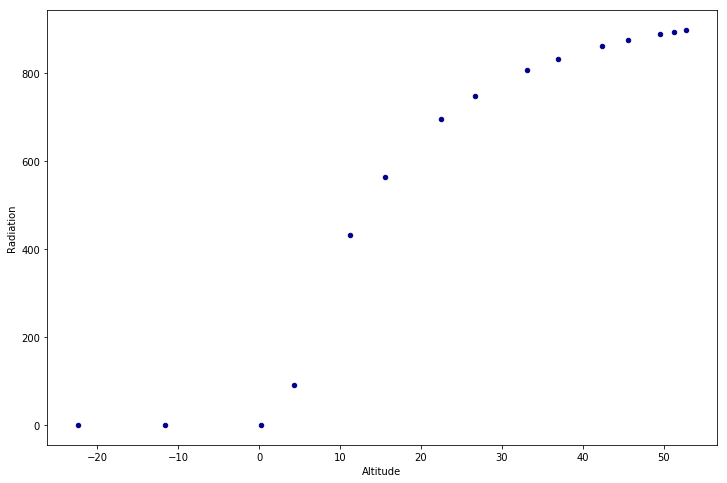

In [132]:
dfSunMeasures.plot.scatter(x='Altitude',y='Radiation',c='DarkBlue',figsize=(12,8))

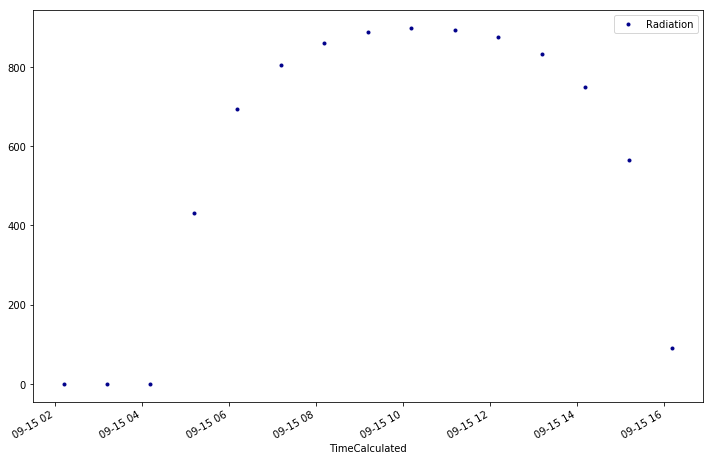

In [133]:
dfSunMeasures.plot(y='Radiation',c='DarkBlue',style='.',figsize=(12,8))

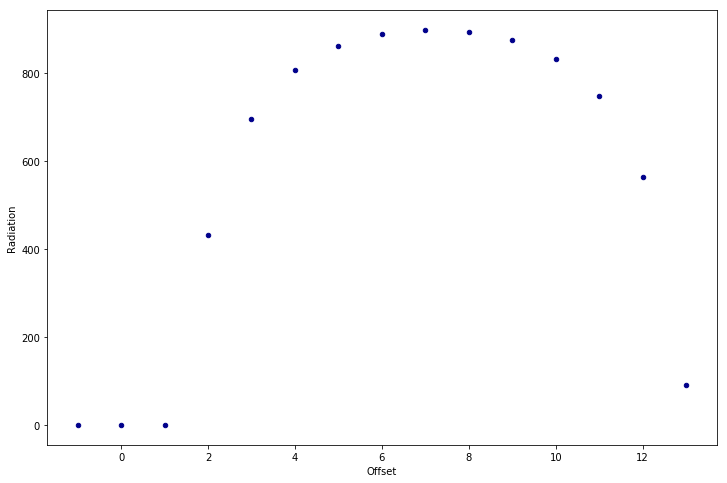

In [134]:
dfSunMeasures.plot.scatter(x='Offset',y='Radiation',c='DarkBlue',figsize=(12,8))